In [1]:
from datetime import datetime, timedelta
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
gsheet = "https://docs.google.com/spreadsheets/d/1S6_jPmeOA-SL6jDyX53FsQ3NPyWfZD8gfQ8CnBs7lqM/export?format=xlsx"

df = pd.read_excel(gsheet, engine="openpyxl", sheet_name="Analysis")
df

,Date,Expense,Purpose,Category
0,2024-09-01,1194,Curtains,Flat
1,2024-09-01,112,Auto,Transport
2,2024-09-01,206,Mc Donalds,Food
3,2024-09-01,118,Auto,Transport
4,2024-09-01,140,Swiggy,Food
...,...,...,...,...
82,2024-10-13,580,Groceries,Flat
83,2024-10-14,50,Lunch,Food
84,2024-10-15,140,Groceries,Flat
85,2024-10-17,285,Dinner,Food


In [97]:
df_day_expense = df.groupby("Date")["Expense"].sum()

In [25]:
df.info()
print("\n========================================================\n")
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      87 non-null     datetime64[ns]
 1   Expense   87 non-null     int64         
 2   Purpose   87 non-null     object        
 3   Category  87 non-null     object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 2.8+ KB




,Date,Expense
count,87,87.000000
mean,2024-09-20 03:35:10.344827648,712.908046
min,2024-09-01 00:00:00,10.000000
25%,2024-09-06 00:00:00,75.500000
50%,2024-09-20 00:00:00,160.000000
75%,2024-09-29 00:00:00,344.500000
max,2024-10-18 00:00:00,17103.000000
std,NaN,2468.418944


In [46]:
df.groupby([df["Date"].dt.month, "Category"])["Expense"].sum()

Date  Category 
9     Flat         23413
      Food          4664
      Health         168
      Home          2094
      Personal       621
      Self           100
      Transport     1361
      Travel        5289
10    Flat         17562
      Food          1538
      Personal      1853
      Transport      367
      Travel        2993
Name: Expense, dtype: int64

In [98]:
# Get the current year
current_year = datetime.now().year - 1

# Generate a date range for the entire year
start_date = datetime(current_year, 1, 1)
end_date = datetime(current_year, 12, 31)

# Create a date range for all dates in the year
all_dates = pd.date_range(start=start_date, end=end_date, freq="D")

# Create a DataFrame with dates and day names
dates_with_days = pd.DataFrame(
    {
        "Date": all_dates,
        "M": list(map(int, list(all_dates.strftime("%m")))),
        "D": list(map(int, list(all_dates.strftime("%d")))),
        "W": list(map(int, list(all_dates.strftime("%U")))),
        "Month": all_dates.strftime("%B"),
        "Day": all_dates.strftime("%A"),
    }
)

df1 = dates_with_days.merge(df_day_expense, left_on="Date", right_on="Date", how="left")
df1

,Date,M,D,W,Month,Day,Expense
0,2024-01-01,1,1,0,January,Monday,NaN
1,2024-01-02,1,2,0,January,Tuesday,NaN
2,2024-01-03,1,3,0,January,Wednesday,NaN
3,2024-01-04,1,4,0,January,Thursday,NaN
4,2024-01-05,1,5,0,January,Friday,NaN
...,...,...,...,...,...,...,...
361,2024-12-27,12,27,51,December,Friday,NaN
362,2024-12-28,12,28,51,December,Saturday,NaN
363,2024-12-29,12,29,52,December,Sunday,NaN
364,2024-12-30,12,30,52,December,Monday,NaN


In [100]:
# dates_with_days[dates_with_days["M"]==datetime.now().month]
day_order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
calendar = df1[df1["Month"] == "September"].pivot(columns="Day", index="W", values="D")[day_order]
calendar_val = df1[df1["Month"] == "September"].pivot(columns="Day", index="W", values="Expense")[day_order]

In [102]:
calendar

Day,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
W,,,,,,,
35,1.0,2.0,3.0,4.0,5.0,6.0,7.0
36,8.0,9.0,10.0,11.0,12.0,13.0,14.0
37,15.0,16.0,17.0,18.0,19.0,20.0,21.0
38,22.0,23.0,24.0,25.0,26.0,27.0,28.0
39,29.0,30.0,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='Day', ylabel='W'>

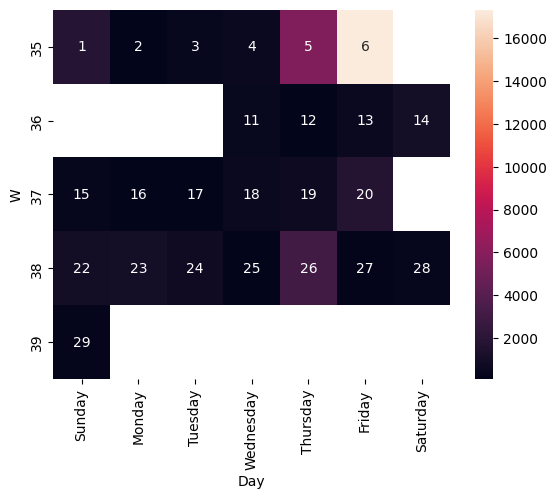

In [105]:
sns.heatmap(calendar_val, annot=calendar)